In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_Network_Intrusion_Dataset import Dataset_IoT_Network_Intrusion_Dataset
from experiment import Experiment
import matplotlib.pyplot as plt


In [ ]:
dataset1 = Dataset_NSL_KDD(config_filename="config_NSL_KDD.json")
exp1 = Experiment(dataset1.data, dataset1.labels, dataset1.config)
exp1.run(model_params={"k": 500 , "n_features" : 30})

Fit time: 33.4973
Evaluate time: 4.1686
Accuracy: 0.9397
F1: 0.9553


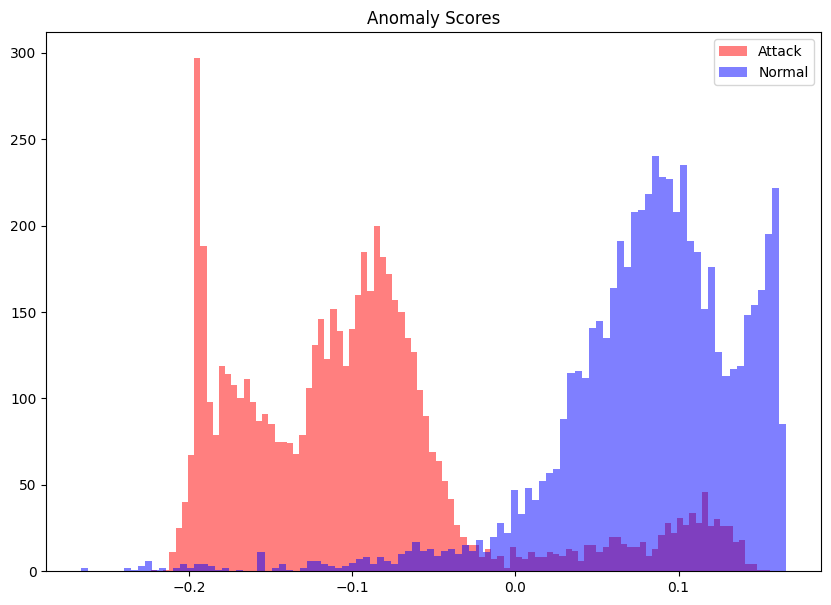

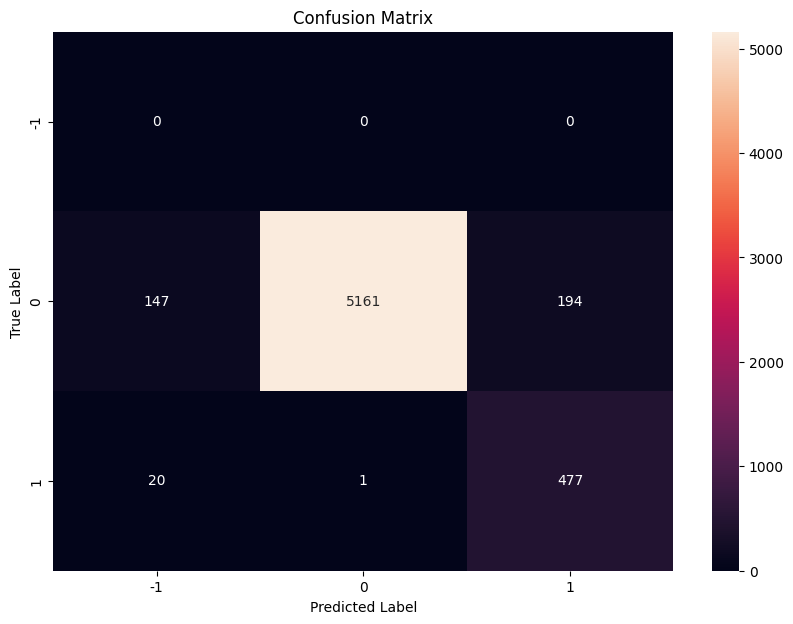

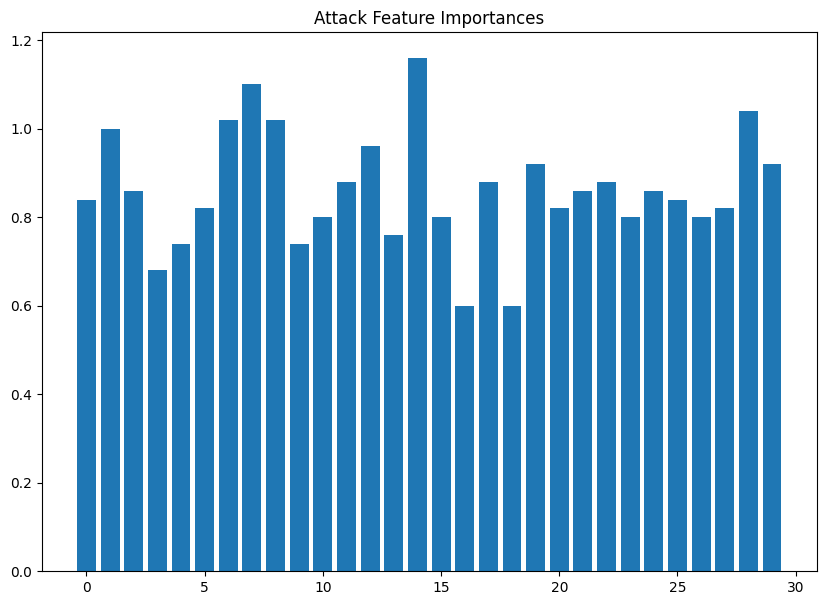

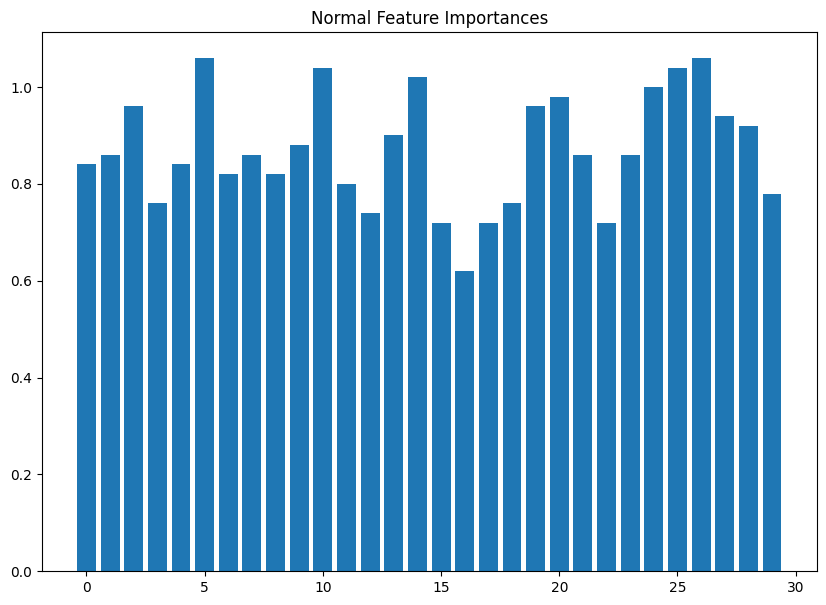

In [2]:
dataset2 = Dataset_UNSW_NB15(config_filename="config_UNSW_NB15.json")
exp2 = Experiment(dataset2.data, dataset2.labels, dataset2.config)
exp2.run(model_params={"k": 100000 , "n_features" : 30})

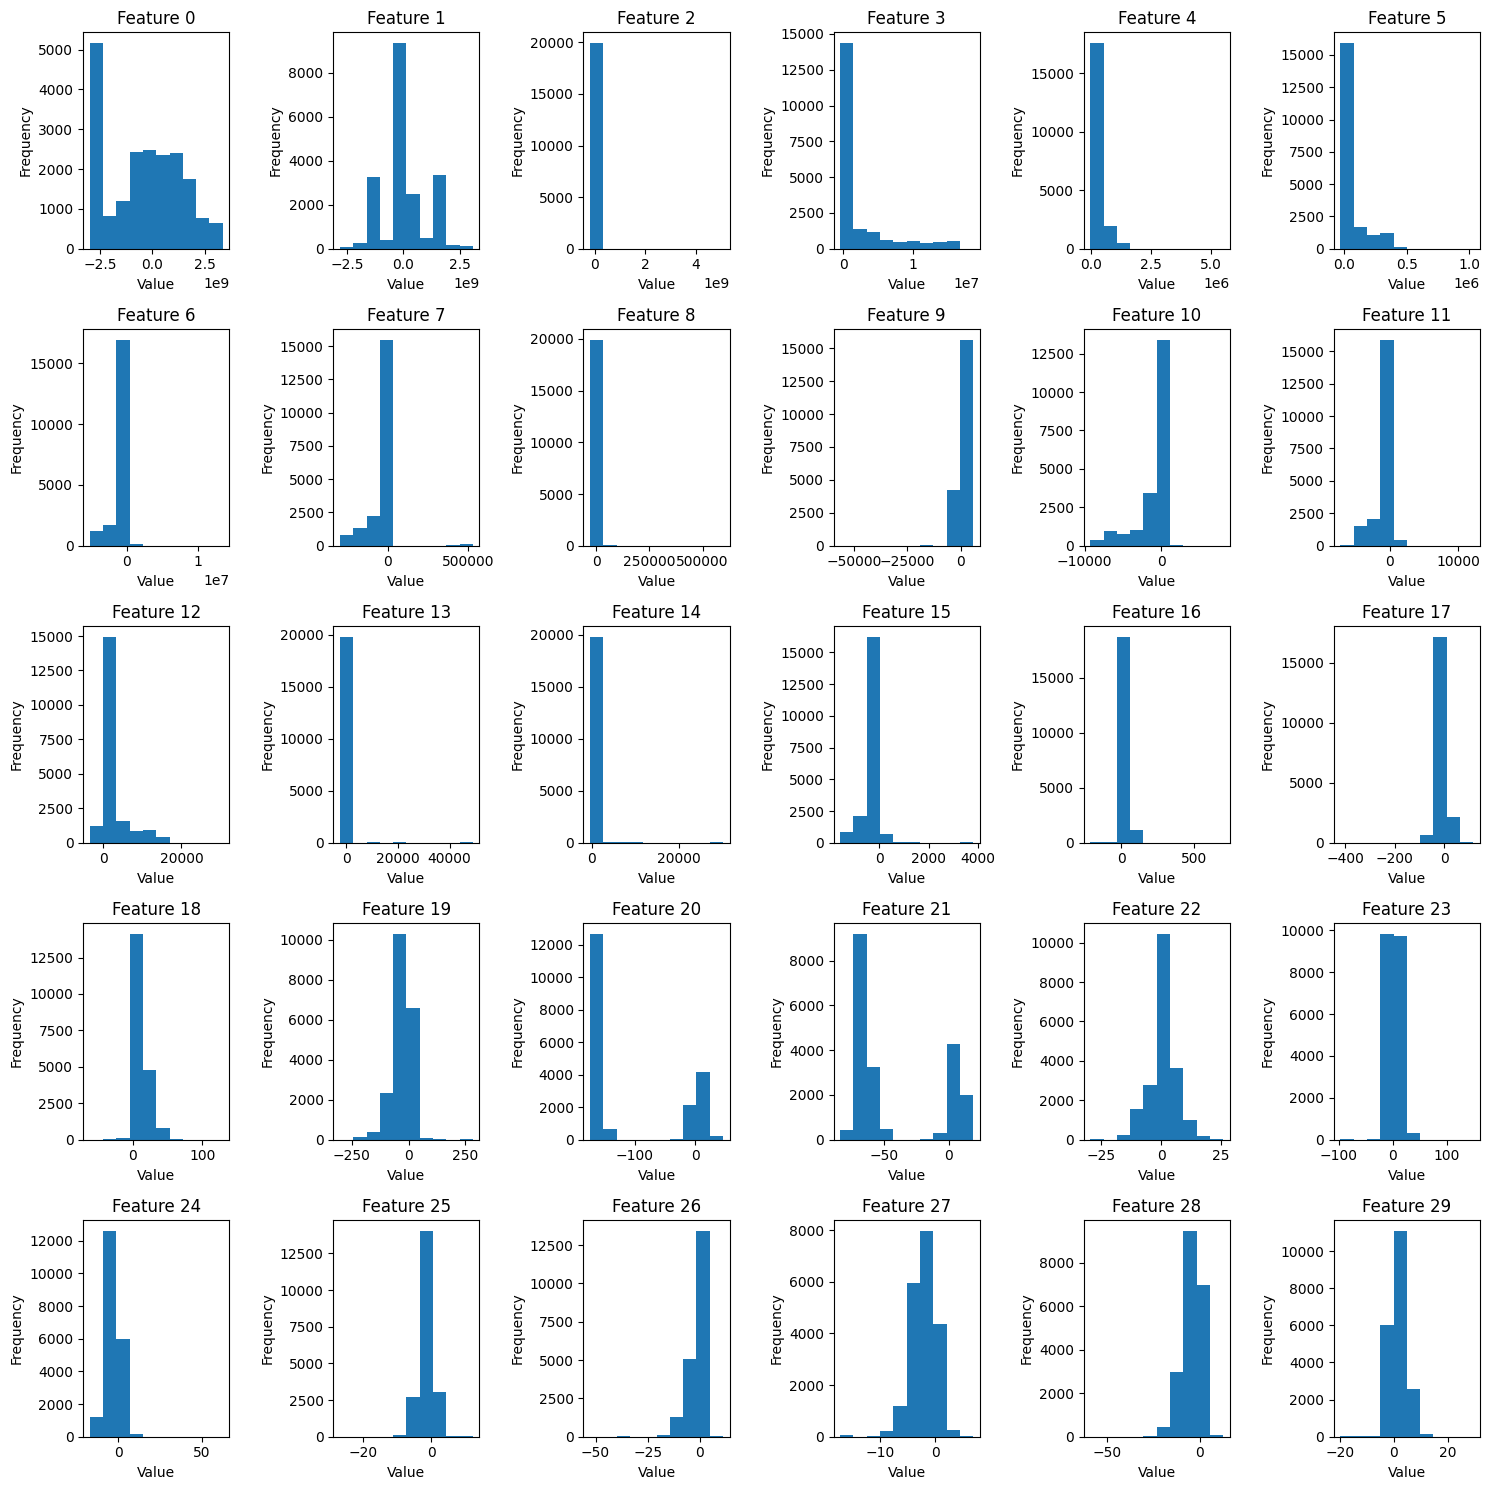

In [17]:
import sklearn.preprocessing as preprocessing
from transformer import Transformer
mm = preprocessing.MinMaxScaler()
t = Transformer(dataset2.data, dataset2.config)
d = t.transform()
d = exp2.model.pca_attack.transform(d)

n_rows = 5
n_cols = 6
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i in range(exp2.model.n_features):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].hist(d[:,i])
    axs[row, col].set_title("Feature " + str(i))
    axs[row, col].set_xlabel("Value")
    axs[row, col].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


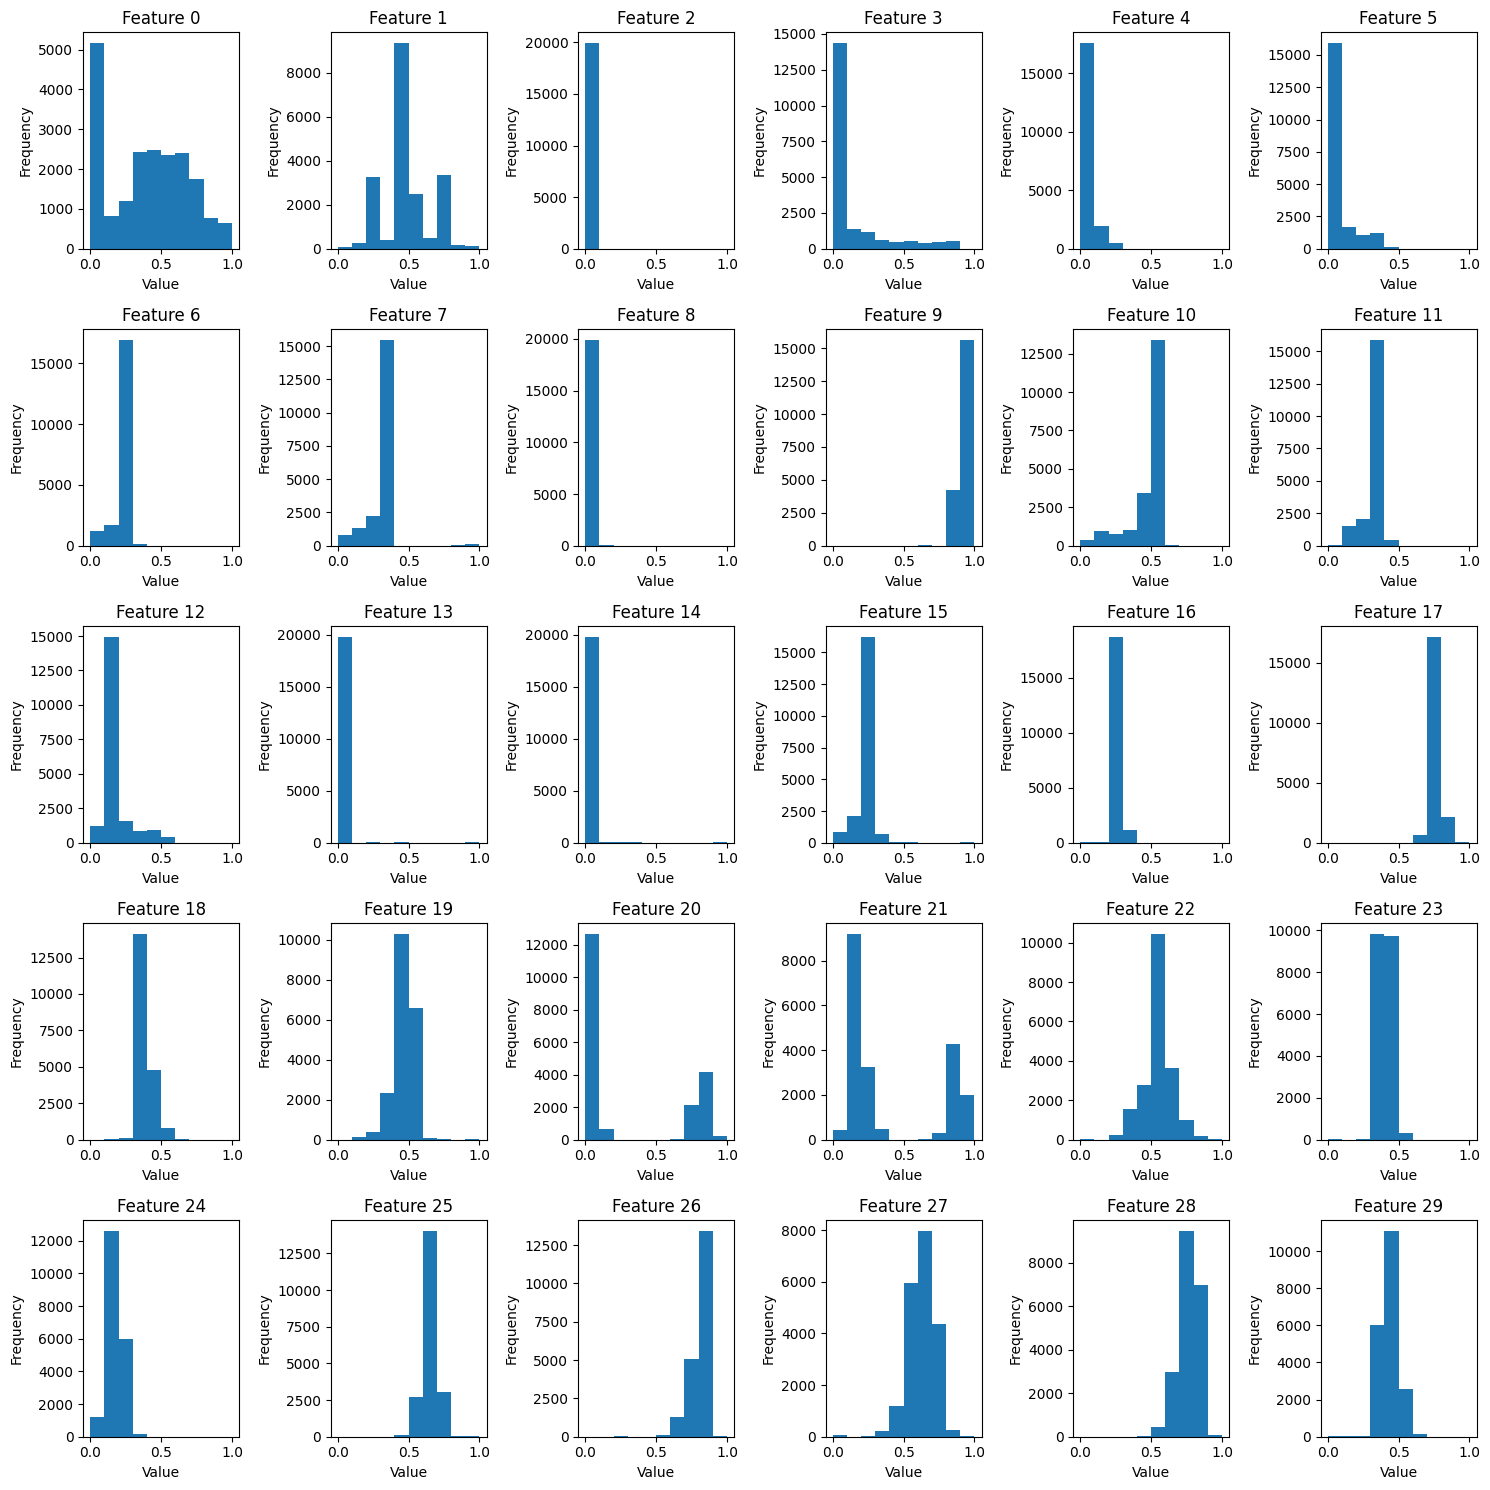

In [18]:
d = mm.fit_transform(d)
n_rows = 5
n_cols = 6

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
for i in range(exp2.model.n_features):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].hist(d[:,i])
    axs[row, col].set_title("Feature " + str(i))
    axs[row, col].set_xlabel("Value")
    axs[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
dataset3 = Dataset_IoT_Network_Intrusion_Dataset(config_filename="config_IoT_Network_Intrusion_Dataset.json")
exp3 = Experiment(dataset3.data, dataset3.labels, dataset3.config)
exp3.run(model_params={"k": 500 , "n_features" : 30})

In [ ]:
# kの値と対応する精度を保存するリスト
k_values = []
accuracies = []
dataset2 = Dataset_UNSW_NB15(config_filename="config_UNSW_NB15.json")
exp2 = Experiment(dataset2.data, dataset2.labels, dataset2.config)

# kの値を10から500まで変えて実験
for k in range(2000, 50, -50):
    print(f"Current k: {k}", end="\r")
    # モデルの訓練と評価
    exp2.run(model_params={"k": k , "n_features" : 30})
    
    # kの値と精度を保存
    k_values.append(k)
    accuracies.append(exp2.accuracy)

# 精度をグラフで表示
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of k')
plt.show()